In [1]:
# %matplotlib inline
import sys
sys.path.append('../../utils')
import utils as u
import math

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import numpy as np
from random import randint
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.backends.backend_pdf import PdfPages

from palettable.colorbrewer.sequential import YlGnBu_5

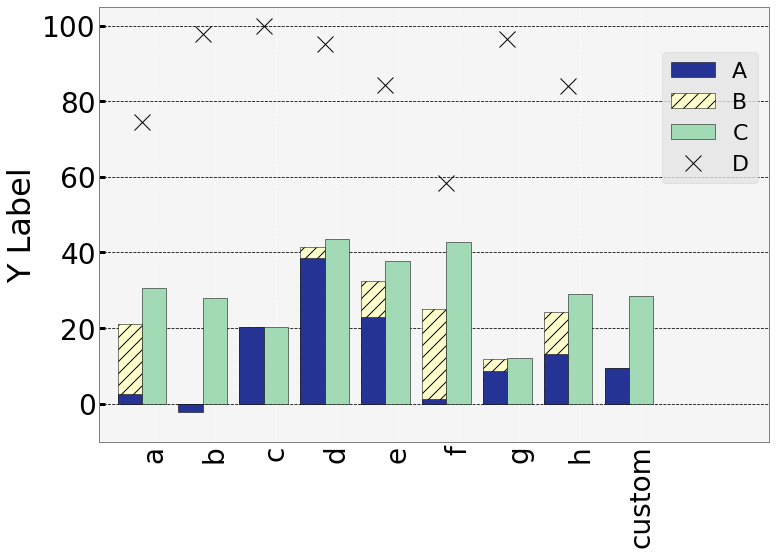

In [2]:
df = pd.read_csv('../../data/03-test.csv')

# Plot type
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)


# Set limits for X and Y axises
plt.xlim(-0.5, 10.5)
plt.ylim(-10, 105)


N = len(df['name'])
ind = np.arange(N+1)
width = 0.4

# Computing geomean
pathgm = u.gm([x for x in df['paths'].values.tolist() if x > 0])
chopgm = u.gm(df['merge'])
oraclegm = u.gm([x for x in df['oracle-path'].values.tolist() if x > 0])

# bar.hatch -> puting patterns on the colors
opbars = ax.bar(ind, df['oracle-path'].values.tolist() + [pathgm], width, \
               ecolor='k', color=YlGnBu_5.hex_colors[0], edgecolor='k',
              hatch='//');

# Overlapping the first bar with the second bar, we don't add the previous value to make a stacked bar
# we overlap the second bar with the second bar
pbars = ax.bar(ind, df['paths'].values.tolist() + [pathgm], width, \
               ecolor='k', color=YlGnBu_5.hex_colors[4], edgecolor='k')


# Putting markers on top of the bar plots
# Move the markers with setting the first parameter
prec = ax.plot(np.arange(N)+0.2,
               [x*100 for x in df['precision'].values.tolist()],
               'x', markersize=16, color='k');

# Drawing the second bar.
# We move the second bar equal to the width of the plot.
# The width of the each bar plot is equal to 1, therefore, if there is multiple of these bar plots
# their width should be fraction of the one
cbars = ax.bar(ind+0.4, df['merge'].values.tolist() + [chopgm], \
               width, ecolor='k', color=YlGnBu_5.hex_colors[1], edgecolor='k');


# Put the x labels if the value is less than (-10)
c = 0
for t in df['paths']:
    if t < -10:
        ax.text(c+0.05, -5, str(int(t)), fontsize=20, rotation=90)
    c += 1


ax.set_ylabel('Y Label', color='black', fontsize=32)
ax.set_xticks(ind+0.4);

# Adding extra name to the x labels
# rotation='degree' for rotating the text
ax.set_xticklabels(u.rename(df['name'])+['custom'])


### Style
# Set the background color
ax.set_facecolor('whitesmoke')

plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True, color='black')

plt.tick_params( axis='x', which='both', bottom=False, top=False, colors='black')
plt.tick_params( axis='y', which='both', right=False, colors='black' )

plt.tick_params(axis='both', which='major', direction='in', 
                length=6, width=3,color='black', labelsize=28)
plt.grid(linestyle='--')

ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')

# Adding legend and the position
ax.legend((pbars[0], opbars[0], cbars[0], prec[0]), ('A', 'B', 'C', 'D'), bbox_to_anchor=(1, 0.92), fontsize=22)

# fig.savefig('test.pdf',
#     facecolor=fig.get_facecolor(), bbox_inches='tight')